# Final Project: Data Wrangling and SQL (Pacmann)

## 1. Import Library

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
con = sqlite3.connect("olist.db") 

In [4]:
# lihat list table
invoice = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
invoice

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


## 2. Objective

* Perusahaan ingin mengetahui 10 produk yang paling banyak terjual
* Perusahaan ingin mengetahui 10 produk yang menghasilkan total sales paling tinggi
* Perusahaan ingin mengetahui apakah produk yang paling banyak dipesan menghasilkan total sales yang besar pula
* Perusahaan ingin mengetahui pertumbuhan order dari 10 produk yang paling laris
* Perusahaan ingin mengetahui tren total pendapatan penjualan bulanan dari 10 produk yang paling laris

## 3. Data Load

In [5]:
# # Membuat query
query = """
SELECT * FROM olist_order_dataset
"""

# Mengakses table order
order = pd.read_sql(query, con)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
# # Membuat query
query = """
SELECT * FROM olist_order_items_dataset;
"""
# Mengakses table order items
order_items = pd.read_sql(query, con)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
# # Membuat query
query = """
SELECT * FROM olist_products_dataset
"""

# Mengakses table products
products = pd.read_sql(query, con)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
# # Membuat query
query = """
SELECT * FROM product_category_name_translation ;
"""
# Mengakses table product category
product_category = pd.read_sql(query, con)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## 4. Data Cleansing

### Tabel order

In [9]:
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# memilih kolom yang akan digunakan
order = order[['order_id', 'order_status', 'order_purchase_timestamp']]
order.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [11]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   order_status              99441 non-null  object
 2   order_purchase_timestamp  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [12]:
# cek missing value
order.isnull().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [13]:
# mengubah tipe data kolom order_purchase_timestamp menjadi date
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])

In [14]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   order_status              99441 non-null  object        
 2   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [15]:
order.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [16]:
# mengumpulkan semua tahun dari kolom order_purchase_timestamp
order['order_purchase_timestamp'].dt.year.unique()

array([2017, 2018, 2016])

In [17]:
# cek duplicate data
order.duplicated().sum()

0

### Tabel order items

In [18]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
# cek duplicate data
order_items.duplicated().sum()

0

In [20]:
# memilih kolom yang akan digunakan
order_items = order_items[['order_id', 'product_id', 'price']]
order_items.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


In [21]:
# cek missing value
order_items.isnull().sum()

order_id      0
product_id    0
price         0
dtype: int64

### Tabel products

In [22]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
# cek duplicate data
products.duplicated().sum()

0

In [24]:
# memilih kolom yang akan digunakan
products = products[['product_id', 'product_category_name']]
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


### Tabel product category

In [25]:
product_category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [26]:
# cek duplicate data
product_category.duplicated().sum()

0

In [27]:
# memilih kolom yang akan digunakan
product_category = product_category[['product_category_name', 'product_category_name_english']]
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Join Table products dan product category

In [28]:
# join table products dan product_category berdasarkan kolom product_category_name
new_products = pd.merge(products, product_category, on='product_category_name', how='left')
new_products.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [29]:
# drop product_category_name
new_products = new_products.drop('product_category_name', axis=1)

# rename kolom product_category_name_english menjadi product_category_name
new_products = new_products.rename(columns={'product_category_name_english': 'product_name'})
new_products.head()

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [30]:
# cek missing value
new_products.isnull().sum()

product_id        0
product_name    623
dtype: int64

In [31]:
# handling missing value
# mengisi missing value dengan 'unknown'
new_products['product_name'] = new_products['product_name'].fillna('unknown')

# cek missing value
new_products.isnull().sum()

product_id      0
product_name    0
dtype: int64

### Cek Inkonsistensi Format


In [32]:
new_products['product_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

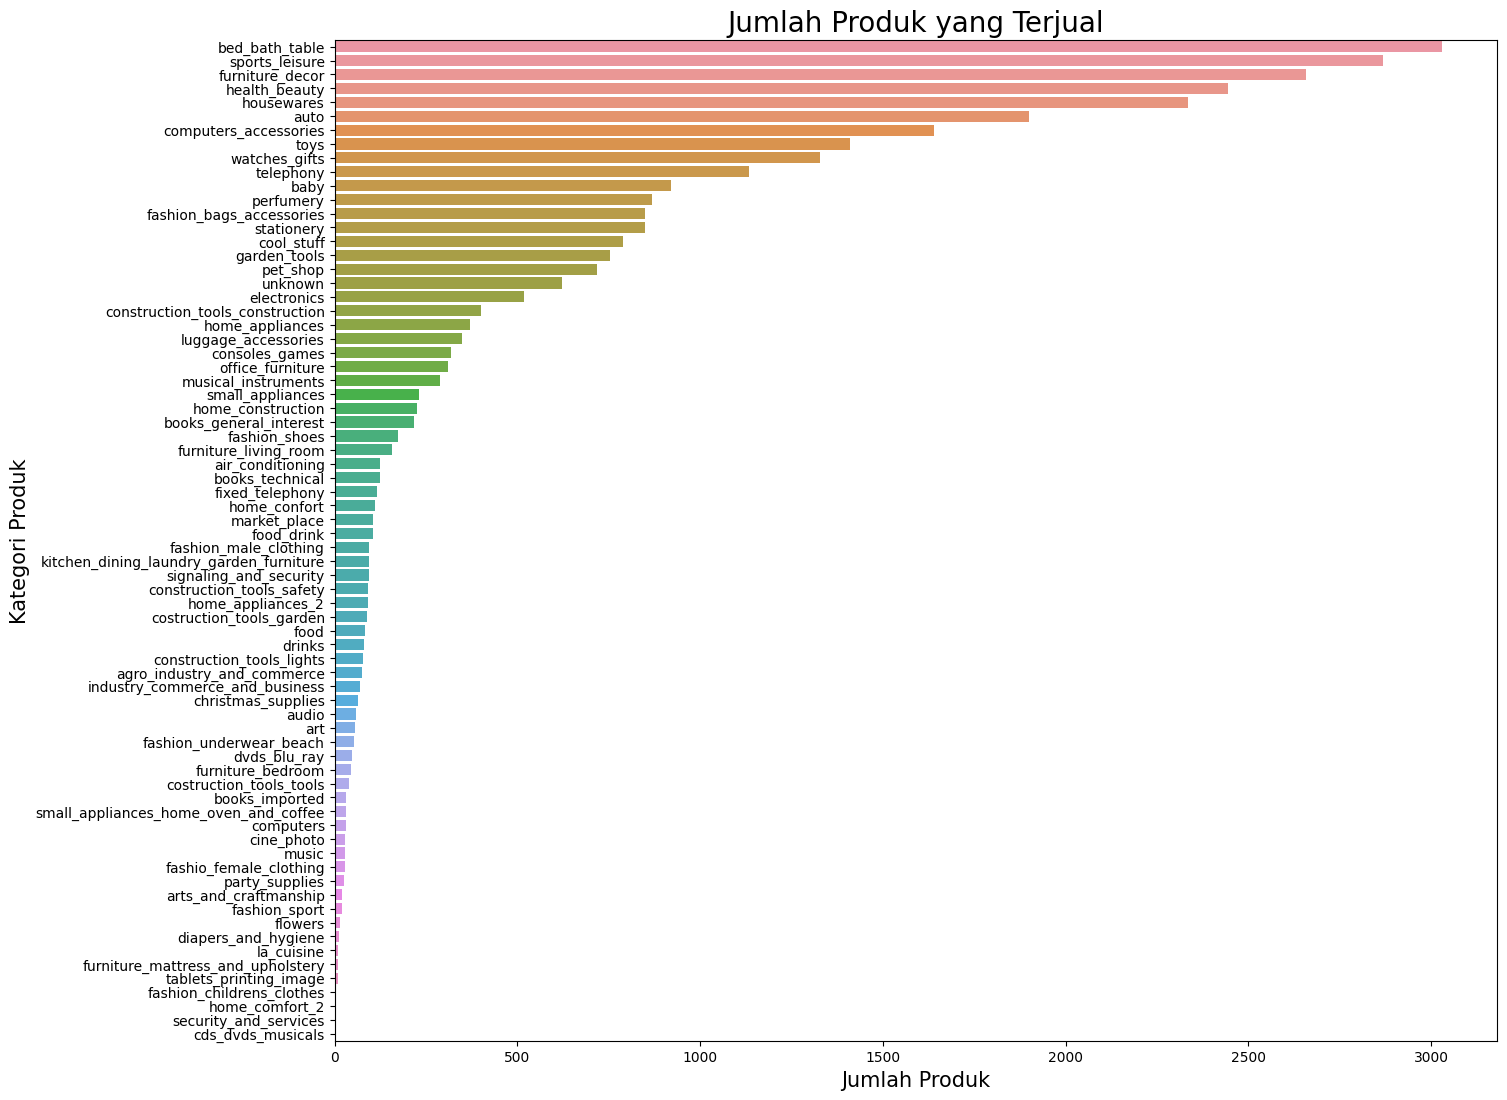

In [33]:
# menghitung jumlah produk yang terjual dan menampilkannya dalam bentuk bar plot
plt.figure(figsize=(15, 13))
sns.countplot(y='product_name', data=new_products, order=new_products['product_name'].value_counts().index)
plt.title('Jumlah Produk yang Terjual', fontsize=20)
plt.xlabel('Jumlah Produk', fontsize=15)
plt.ylabel('Kategori Produk', fontsize=15)
plt.show()


In [34]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## 5. Exploratory Data Analysis

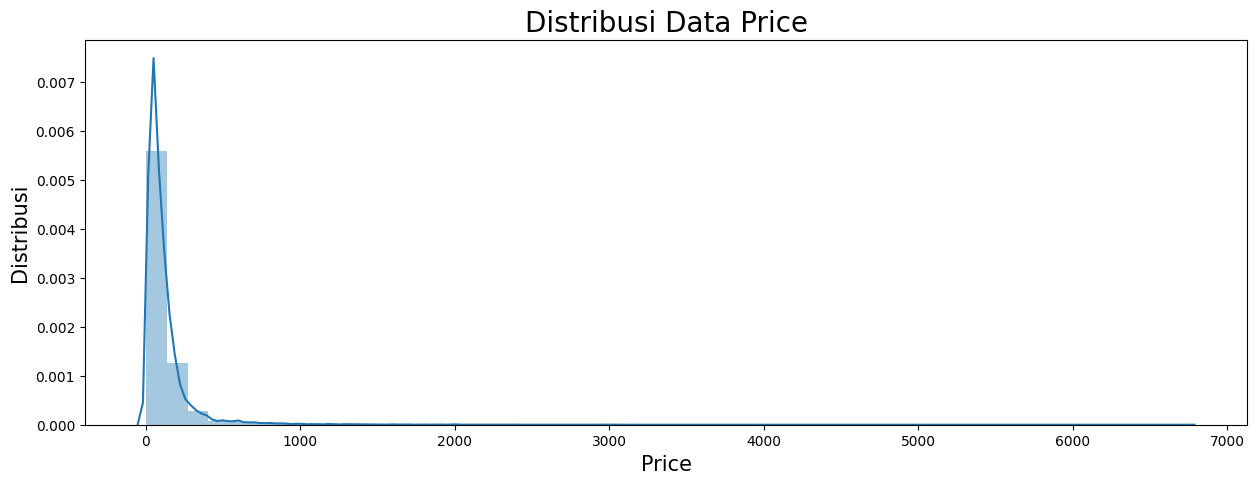

In [35]:
# visualisasi distribusi data price
plt.figure(figsize=(15, 5))
sns.distplot(order_items['price'])
plt.title('Distribusi Data Price', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Distribusi', fontsize=15)
plt.show()

Data price memiliki bentuk skewed distribution yang artinya memiliki outlier. Maka visualisasi akan lebih baik jika menggunakan logaritma dari price.

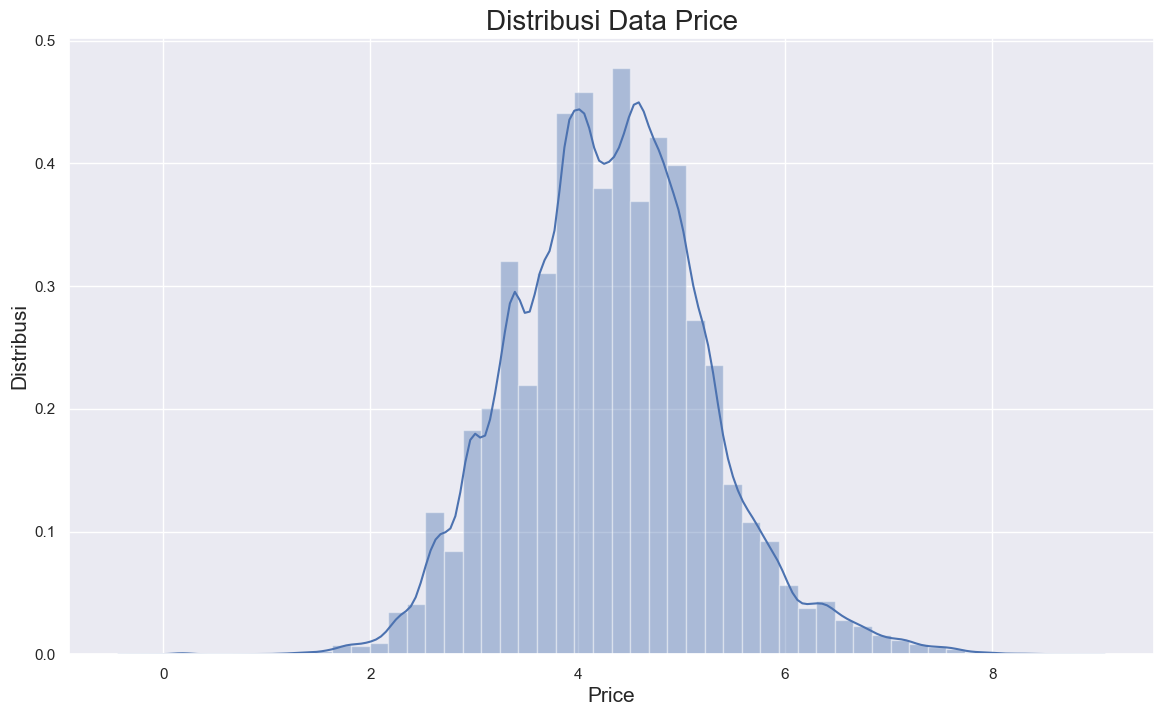

In [36]:
# TRANSFORMASI HARGA JADI LOG PRICE
order_items['log_price'] = np.log(order_items['price'])

# visualisasi distribusi data price
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(order_items['log_price'])
plt.title('Distribusi Data Price', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Distribusi', fontsize=15)
plt.show()

Data price memiliki distribusi normal setelah dilakukan penyesuaian skala menggunakan logaritma.

Outlier akan tetap dibiarkan karena berpengaruh terhadap objektif analisis yang akan dilakukan.

### Data Manipulation

Daftar tabel yg sudah terbentuk

- new_products
- order
- order_items

#### Menggabungkan 3 tabel yang sudah terbentuk

In [37]:
# Left join table order_items dengan table new_products berdasarkan kolom product_id
new_order_items = pd.merge(order_items, new_products, on='product_id', how='left')
new_order_items.head()


,order_id,product_id,price,log_price,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,4.075841,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,5.480222,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,5.293305,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2.564180,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,5.297817,garden_tools


In [38]:
# left join table new_order_items dengan order table  berdasarkan kolom order_id
df = pd.merge(new_order_items, order, on='order_id', how='left')
df.head()

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,4.075841,cool_stuff,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,5.480222,pet_shop,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,5.293305,furniture_decor,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2.564180,perfumery,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,5.297817,garden_tools,delivered,2017-02-04 13:57:51


In [39]:
# cek missing value
df.isnull().sum()

order_id                    0
product_id                  0
price                       0
log_price                   0
product_name                0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   product_id                112650 non-null  object        
 2   price                     112650 non-null  float64       
 3   log_price                 112650 non-null  float64       
 4   product_name              112650 non-null  object        
 5   order_status              112650 non-null  object        
 6   order_purchase_timestamp  112650 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [41]:
# membuat kolom year, month, day, and hour
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['day'] = df['order_purchase_timestamp'].dt.day
df.head()

,order_id,product_id,price,log_price,product_name,order_status,order_purchase_timestamp,year,month,day
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,4.075841,cool_stuff,delivered,2017-09-13 08:59:02,2017,9,13
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,5.480222,pet_shop,delivered,2017-04-26 10:53:06,2017,4,26
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,5.293305,furniture_decor,delivered,2018-01-14 14:33:31,2018,1,14
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2.564180,perfumery,delivered,2018-08-08 10:00:35,2018,8,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,5.297817,garden_tools,delivered,2017-02-04 13:57:51,2017,2,4


In [42]:
# min and max date
print('Min date: ', df['order_purchase_timestamp'].min())
print('Max date: ', df['order_purchase_timestamp'].max())

Min date:  2016-09-04 21:15:19
Max date:  2018-09-03 09:06:57


### 1. Perusahaan ingin mengetahui 10 kategori produk yang paling banyak terjual

In [43]:
# mengetahui 10 produk yang paling banyak terjual
top_products = df['product_name'].value_counts().head(10)


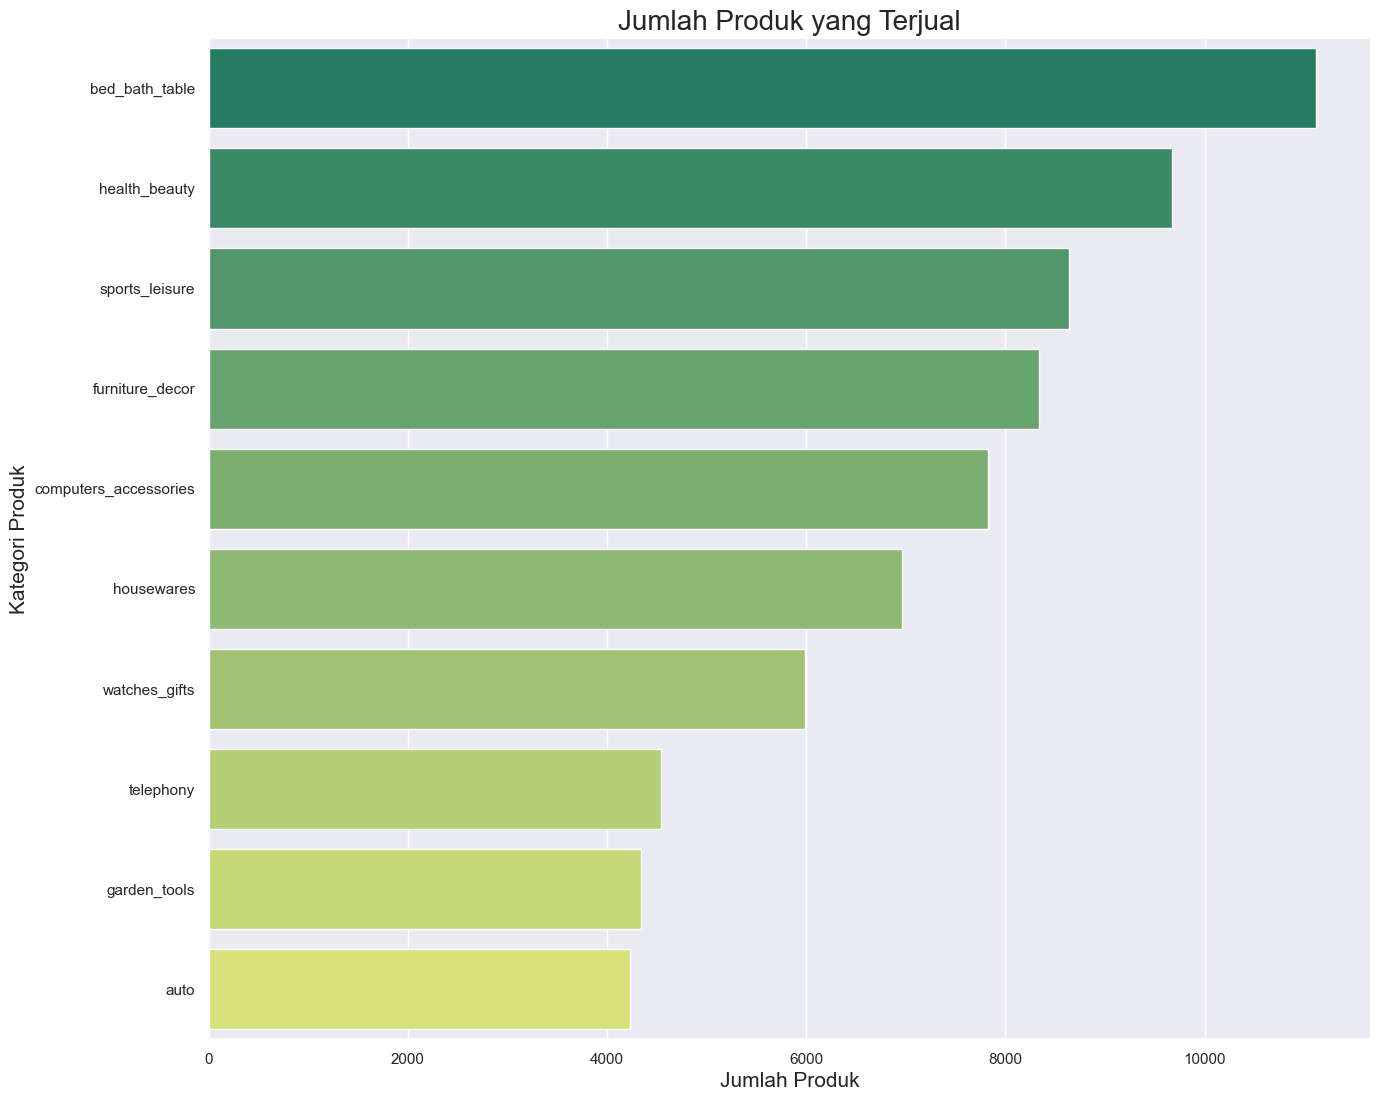

In [44]:
# menghitung jumlah produk yang terjual dan menampilkan 10 produk teratas dalam bentuk bar plot 
plt.figure(figsize=(15, 13))
sns.countplot(y='product_name', data=df, order=top_products.index, palette='summer')
plt.title('Jumlah Produk yang Terjual', fontsize=20)
plt.xlabel('Jumlah Produk', fontsize=15)
plt.ylabel('Kategori Produk', fontsize=15)
plt.show()

Didapatkan hasil bahwa Kategori produk yang paling banyak di-order oleh customer adalah bed_bath_table dengan kuantitas order sebanyak 11115. Lalu, diikuti oleh product category health_beauty sebanyak 9670 dan produk sports_leisure sebanyak 8641. Sementara itu, product category yang menduduki posisi ke-10 adalah auto sebesar 4235 order.

### 2. Perusahaan ingin mengetahui 10 produk yang menghasilkan total sales paling tinggi

In [45]:
# mengetahui 10 produk yang menghasilkan total sales paling tinggi
total_sales = df.groupby('product_name')['price'].sum().sort_values(ascending=False).head(10)
total_sales

product_name
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64

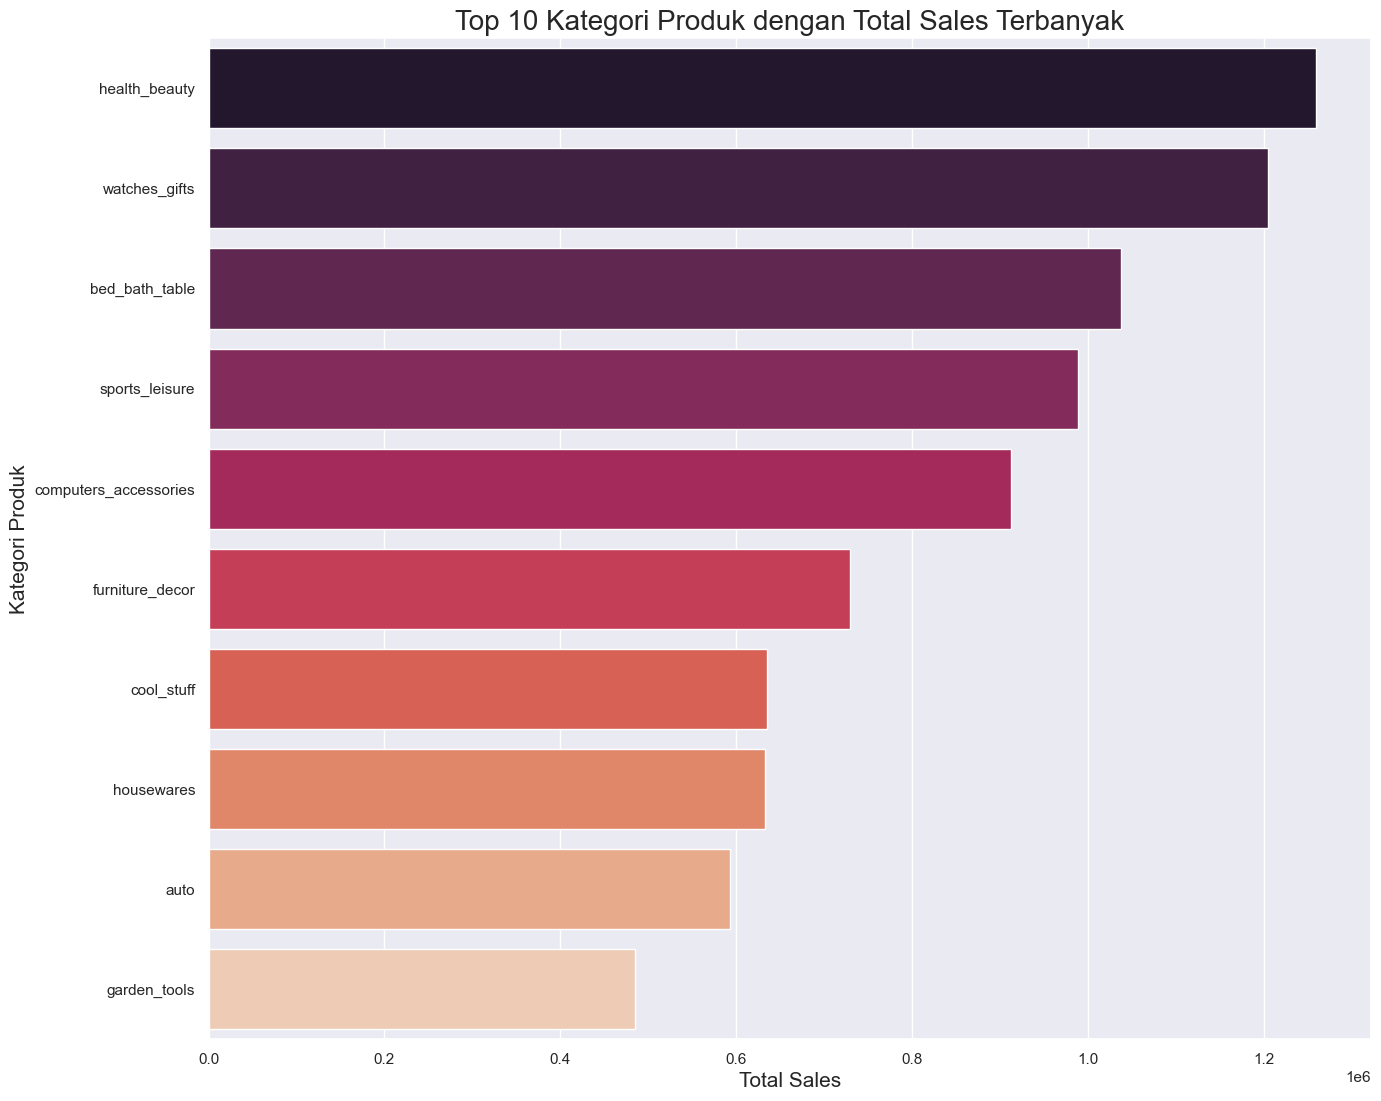

In [46]:
# visualisasi 10 produk yang menghasilkan total sales paling tinggi
plt.figure(figsize=(15, 13))
sns.barplot(x=total_sales.values, y=total_sales.index, palette='rocket')
plt.title('Top 10 Kategori Produk dengan Total Sales Terbanyak', fontsize=20)
plt.xlabel('Total Sales', fontsize=15)
plt.ylabel('Kategori Produk', fontsize=15)
plt.show()




Didapatkan hasil bahwa Kategori produk yang menghasilkan total sales paling tinggi adalah health_beauty disusul dengan watches_gifts dan bed_bath_table. Sementara itu, product category yang menduduki posisi ke-10 adalah graden_tools.

### 3. Perusahaan ingin mengetahui apakah produk yang paling banyak dipesan menghasilkan total sales yang besar pula

In [57]:
# mengetahui apakah produk yang paling banyak dipesan menghasilkan total sales yang besar pula
cm = sns.light_palette("green", as_cmap=True)
df.pivot_table(values=['price', 'order_id'], index=['product_name'], aggfunc={'price':np.sum, 'order_id':len}).sort_values(by='order_id', ascending=False).style.background_gradient(cmap=cm)


,order_id,price
product_name,,
bed_bath_table,11115,1036988.680000
health_beauty,9670,1258681.340000
sports_leisure,8641,988048.970000
furniture_decor,8334,729762.490000
computers_accessories,7827,911954.320000
housewares,6964,632248.660000
watches_gifts,5991,1205005.680000
telephony,4545,323667.530000
garden_tools,4347,485256.460000


Diperoleh hasil bahwa produk yang paling banyak dijual akan memiliki kecenderungan untuk menghasilkan total sales yang tinggi pula. Oleh karena itu, perusahaan harus tetap mempertahankan kualitas produk tersebut dan membuat strategi untuk terus menarik atensi customer supaya tetap loyal berbelanja produk tersebut. Misalnya, dengan mengutamakan memasang layanan iklan untuk produk paling laris, memberikan diskon spesial, atau pun menawarkan potongan harga ongkir.

### 4. Perusahaan ingin mengetahui pertumbuhan pemesanan produk dari 10 produk yang paling laris


In [48]:
top_products

product_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

In [49]:
# mengetahui pertumbuhan pemesanan produk dari 10 produk yang paling laris
top_products_growth = df[df['product_name'].isin(top_products.index)].groupby(['month', 'product_name'])['order_id'].count().reset_index()
top_products_growth

,month,product_name,order_id
0,1,auto,302
1,1,bed_bath_table,896
2,1,computers_accessories,738
3,1,furniture_decor,794
4,1,garden_tools,298
...,...,...,...
115,12,health_beauty,466
116,12,housewares,295
117,12,sports_leisure,493
118,12,telephony,267


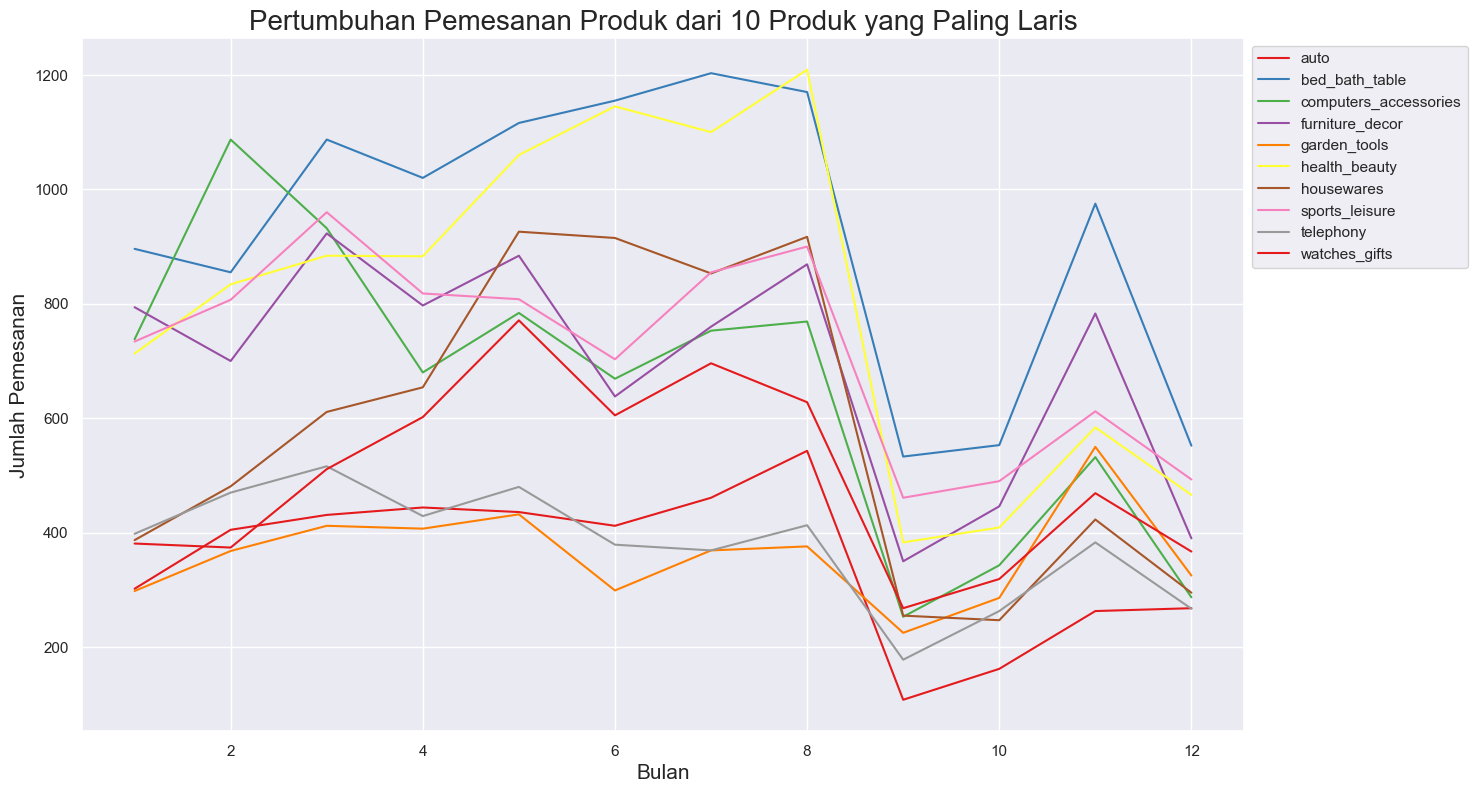

In [50]:
# visualisasi pertumbuhan pemesanan produk dari 10 produk yang paling laris 
plt.figure(figsize=(15, 9))
sns.lineplot(x='month', y='order_id', hue='product_name', data=top_products_growth, palette='Set1')
plt.title('Pertumbuhan Pemesanan Produk dari 10 Produk yang Paling Laris', fontsize=20)
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Jumlah Pemesanan', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Saat memasuki bulan ke-8 terjadi puncak lonjakan penjualan dan di bulan berikutnya terjadi penurunan order yang signifikan, pemesanan produk mengalami penurunan sampai bulan Desember. Meskipun sempat terjadi kenaikan order pada bulan ke-11 tetapi pemesanan produk perlahan-lahan kembali menurun sampai bulan ke-12

### 5. Perusahaan ingin mengetahui tren total pendapatan penjualan bulanan dari 10 produk yang paling laris

In [51]:
# mengetahui tren total penjualan bulanan dari 10 produk yang paling laris
top_products_sales = df[df['product_name'].isin(top_products.index)].groupby(['month', 'product_name'])['price'].sum().reset_index()
top_products_sales

,month,product_name,price
0,1,auto,41213.55
1,1,bed_bath_table,80337.95
2,1,computers_accessories,87181.59
3,1,furniture_decor,68959.49
4,1,garden_tools,35190.69
...,...,...,...
115,12,health_beauty,61264.66
116,12,housewares,25921.95
117,12,sports_leisure,59792.66
118,12,telephony,13611.01


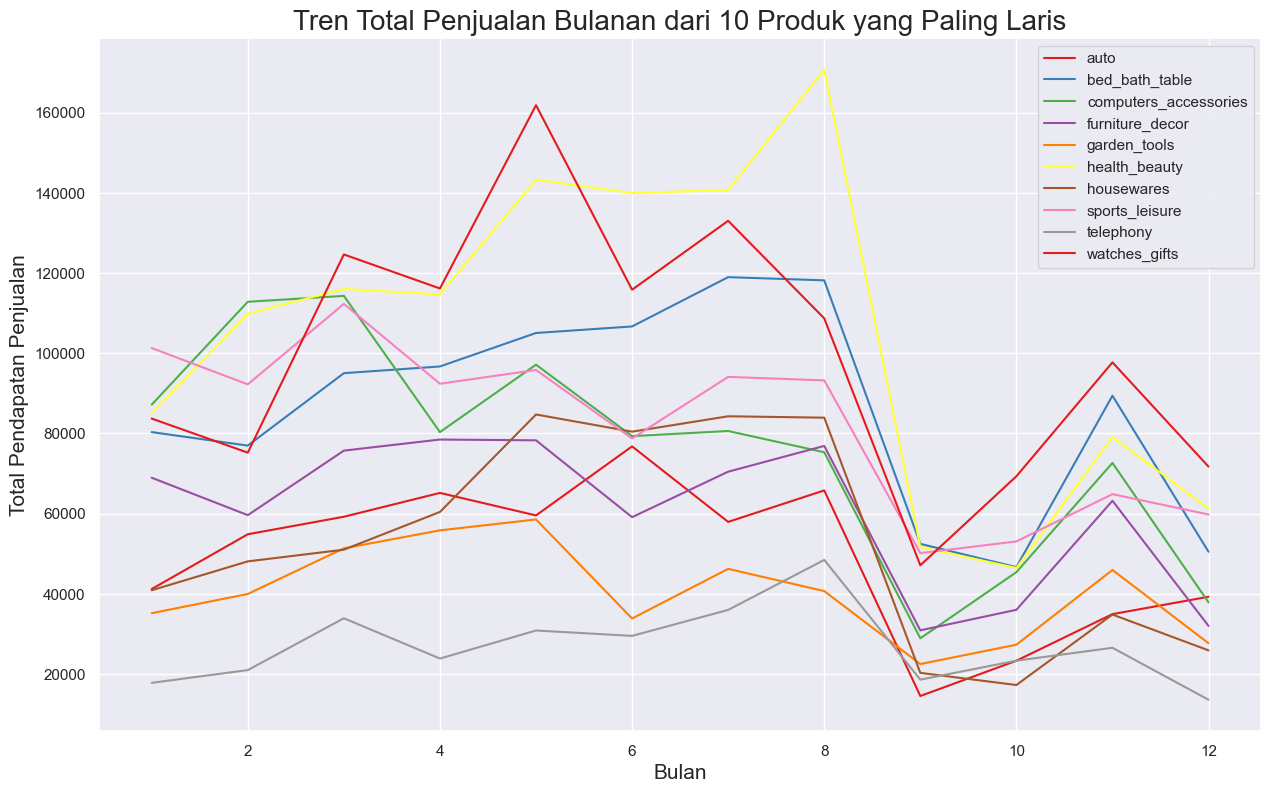

In [52]:
# visualisasi tren total penjualan bulanan dari 10 produk yang paling laris
plt.figure(figsize=(15, 9))
sns.lineplot(x='month', y='price', hue='product_name', data=top_products_sales, palette='Set1')
plt.title('Tren Total Penjualan Bulanan dari 10 Produk yang Paling Laris', fontsize=20)
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Total Pendapatan Penjualan', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Pola tren order produk dan tren total sales memiliki kemiripan, hal ini sangat wajar mengingat visualisasi sebelumnya menunjukkan bahwa produk yang paling banyak dijual cenderung menghasilkan total sales yang tinggi pula. Artinya, ketika terjadi lonjakan penurunan pada pemesanan produk maka akan diiringi pula oleh penurunan sales yang didapat. Dalam kasus ini, lonjakan penurunan sales terjadi dari bulan ke 8 ke 9 sampai penghujung bulan dan sempat mengalami kenaikan sales pada bulan ke-11. Kemudian, perlahan-lahan sales mengalami penurunan lagi.

# 6. Kesimpulan
Produk yang paling laris memiliki kecenderungan untuk menghasilkan total sales yang besar pula. Mulai dari bulan ke-8 terjadi penurunan order serta sales sampai bulan terakhir. Artinya, perusahaan perlu menyiapkan startegi untuk meningkatkan sales dan order yang harus diimplementasikan pada bulan 8 ke 9 untuk tetap meningkatkan order dan sales produk, misalnya memberikan diskon awal bulan, melakukan promosi terutama untuk kategori produk yang paling laris, memberikan voucher gratis ongkir bagi customer yang paling sering melakukan order.